# PCA

In [0]:
from sklearn.decomposition import PCA

# 평균 0, 분산 1을 갖도록 X_features scaling : 여러 scaler 중 하나
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


차원 축소를 하기에 앞서 X feature들 간의 단위 차이를 조정해줘야한다. -> scaling

In [0]:
scaler = StandardScaler()   #평균=0 분산=1 로 스케일 조정
scaler.fit(cancer.data)
data = scaler.transform(cancer.data)

In [0]:
 len(cancer.feature_names)

30

#### pca parameter
n_components : 주성분 개수 설정  
-> 주성분 개수를  n으로 정하면, 상위 n개의 주성분만 유지

In [0]:
pca = PCA(n_components=2) #주성분 개수 = 2개

# pca model 학습 : X_data만 필요
pca.fit(data)

# 학습된 pca model을 이용해 data 변환 : 차원 축소
data_pca = pca.transform(data)
print("원본 데이터 형태:", str(data.shape))
print("축소된 데이터 형태:", str(data_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


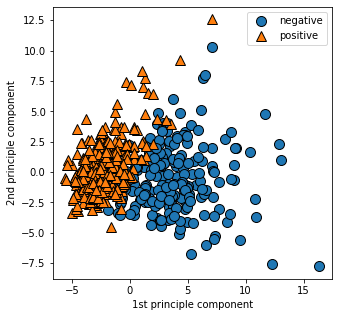

In [0]:
#차원 축소 결과 시각화
plt.figure(figsize=(5, 5))
mglearn.discrete_scatter(data_pca[:, 0], data_pca[:, 1], cancer.target)

plt.xlabel("1st principle component")
plt.ylabel("2nd principle component")

plt.legend(["negative", "positive"], loc="best") #범례 추가 (loc = 위치 0, 1, 2, 3, best)

principle components는 원본 feature들의 조합으로 표현할 수 있다.  
그럼 어떤 조합으로 이루어져 있을까?

In [0]:
print(pca.components_[0], pca.components_[1], sep='\n\n')

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]

[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


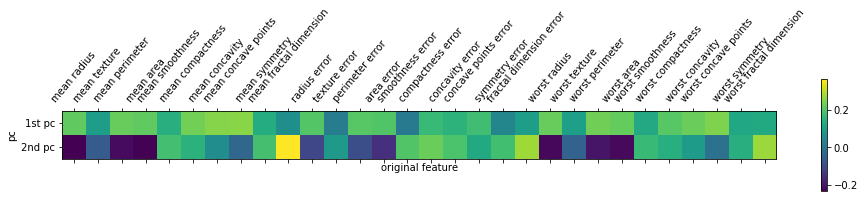

In [0]:
plt.matshow(pca.components_, cmap='viridis') #heatmap

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=50)
plt.yticks([0, 1], ["1st pc", "2nd pc"])

plt.xlabel("original feature")
plt.ylabel("pc")

plt.colorbar()

plt.show()